# Solow Model

Pablo Winant

> **Prerequisites**
>
> This tutorial refers to the lecture on the [convergence of
> sequences](../lectures/convergence/).
>
> Also, make sure you went through the [Julia
> Basics](./Julia_Basics.qmd) before.

# Tutorial: Convergence

### Solow Model

A representative agent uses capital $k_t$ to produce $y_t$ using the
following production function:

$$y_t = k_t^{\alpha}$$

He chooses to consume an amount $c_t \in ]0, y_t]$ and invests what
remains:

$$i_t = y_t - c_t$$

He accumulates capital $k_t$ according to:

$$k_{t+1} = \left( 1-\delta \right) k_{t} + i_{t}$$

where $\delta$ is the depreciation rate and $i_t$ is the amount
invested.

The goal of the representative agent is to maximize:

$$\sum_{t\geq 0} \beta^t U(c_t)$$

where $U(x)=\frac{x^{1-\gamma}}{1-\gamma}$ and $\beta<1$ is the discount
factor.

For now, we ignore the objective and assume that the saving rate
$s=\frac{c_t}{y_t}$ is constant over time.

**Create a `NamedTuple` to hold parameter values $\beta=0.96$,
$\delta=0.1$, $\alpha=0.3$, $\gamma=4$.**

``` {julia}
model = (;\alpha = 0.3, \beta = 0.96, \gamma = 4; \delta = 0.1)
```

**Write down the formula of function $f$ such that $k_{t+1}$:
$k_{t+1} = f(k_t)$.**

``` {julia}
# your text here
```

**Define a function `f(k::Float64, p::NamedTuple)::Float64` to represent
$f$ for a given calibration**

``` {julia}
# your code here
```

**Write a function
`simulate(k0::Float64, T::Int, p::NamedTuple)::Vector{Float64}` to
compute the simulation over `T` periods starting from initial capital
level `k0`.**

``` {julia}
# your code here
```

**Make a nice plot to illustrate the convergence. Do we get convergence
from any initial level of capital?**

``` {julia}
# your code here
```

**Suppose you were interested in using `f` to compute the steady-state.
What would you propose to measure convergence speed? To speed-up
convergence? Implement these ideas.**

``` {julia}
# your code here
```

### **Parameters**

In [1]:
model = (;α = 0.3, β = 0.96, γ= 4, δ = 0.1, s=0.2)


(α = 0.3, β = 0.96, γ = 4, δ = 0.1, s = 0.2)


### **Function $f$ such that $k_{t+1}$: $k_{t+1} = f(k_t)$.**

In [2]:
function f(k,p)
    (; α, δ, s) = p 
    i = s*k^α
    K = (1-δ)*k + i 
end 

f (generic function with 1 method)

In [3]:
f(0.2, model)

0.30340677254400195

### **Simulate trajectory**

In [4]:
function simulate(k0, T, p)
    kvec = [k0]
    for t ∈ 1:T 
        k = kvec[end]
        K = f(k, p)
        push!(kvec, K)
    end
    return kvec 
end 

simulate (generic function with 1 method)

In [5]:
simulate(0.2, 100, model )

101-element Vector{Float64}:
 0.2
 0.30340677254400195
 0.4129080792968781
 0.525003373019628
 0.6373491155565568
 0.7483344417178636
 0.856841626057419
 0.9620988898971137
 1.0635841029776287
 1.1609587708409257
 1.2540211607320604
 1.3426721117933638
 1.4268895787302613
 ⋮
 2.686601895290714
 2.686965684058756
 2.6873040218731723
 2.6876186883735818
 2.6879113388853018
 2.6881835130861362
 2.6884366430712516
 2.6886720608576273
 2.688891005366757
 2.689094628921639
 2.6892840032916374
 2.6894601253165105

In [6]:
function simulate_noalloc(k0, T, p)
    kvec = zeros(T+1)
    kvec[1] = k0 
    for t ∈ 1:T 
        k = kvec[t]
        K = f(k, p)
        kvec[t+1] = K 
    end
    return kvec 
end 

simulate_noalloc (generic function with 1 method)

In [7]:
simulate_noalloc(0.2, 100, model )

101-element Vector{Float64}:
 0.2
 0.30340677254400195
 0.4129080792968781
 0.525003373019628
 0.6373491155565568
 0.7483344417178636
 0.856841626057419
 0.9620988898971137
 1.0635841029776287
 1.1609587708409257
 1.2540211607320604
 1.3426721117933638
 1.4268895787302613
 ⋮
 2.686601895290714
 2.686965684058756
 2.6873040218731723
 2.6876186883735818
 2.6879113388853018
 2.6881835130861362
 2.6884366430712516
 2.6886720608576273
 2.688891005366757
 2.689094628921639
 2.6892840032916374
 2.6894601253165105

### **Plots**

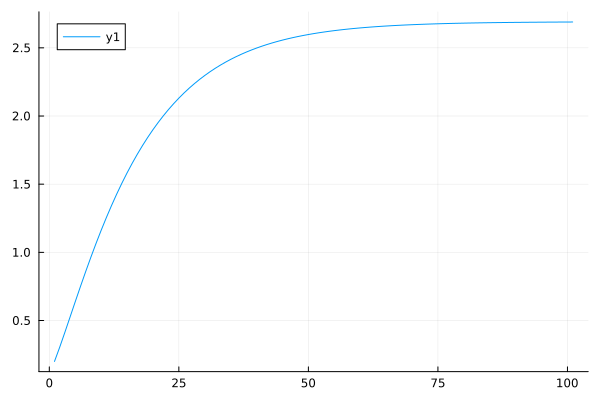

In [8]:
using Plots 
kv = simulate(0.2, 100, model)
plot(kv)

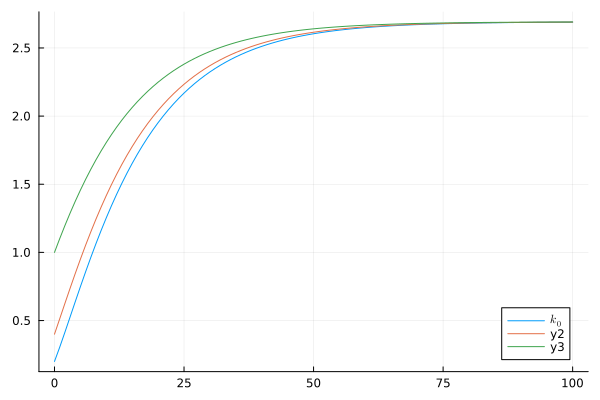

In [9]:
using Plots 

T = 100 
tv = 0:T
kv1 = simulate(0.2, T, model);
kv2 = simulate(0.4, T, model);
kv3 = simulate(1.0, T, model);

pl = plot()
plot!(pl, tv, kv1, label = "\$k_0\$")
plot!(pl, tv, kv2)
plot!(pl, tv, kv3)

In [10]:
k_init = [0.2, 0.4, 1.0]
sims = [simulate(k0,T,model) for k0 in k_init]

3-element Vector{Vector{Float64}}:
 [0.2, 0.30340677254400195, 0.4129080792968781, 0.525003373019628, 0.6373491155565568, 0.7483344417178636, 0.856841626057419, 0.9620988898971137, 1.0635841029776287, 1.1609587708409257  …  2.6873040218731723, 2.6876186883735818, 2.6879113388853018, 2.6881835130861362, 2.6884366430712516, 2.6886720608576273, 2.688891005366757, 2.689094628921639, 2.6892840032916374, 2.6894601253165105]
 [0.4, 0.5119315585864748, 0.6243422704616431, 0.7355508583035453, 0.8443911415579223, 0.9500568333602588, 1.0520006449771238, 1.1498654505051582, 1.2434355847290326, 1.3326014179604118  …  2.687878421679744, 2.6881528990807855, 2.6884081711777905, 2.688645581245582, 2.6888663786779268, 2.68907172553918, 2.689262702660023, 2.689440315308841, 2.6896054984681297, 2.6897591217433026]
 [1.0, 1.1, 1.195801151884219, 1.2872430129191352, 1.3742574618933996, 1.456845771393547, 1.5350611815735393, 1.6089955116075123, 1.6787687913320717, 1.7445211874595348  …  2.689166098397878, 2.

### **Changing parameters**

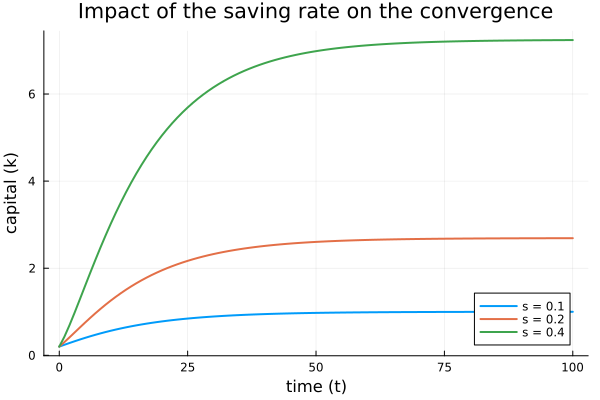

In [ ]:
### Saving rate sensitivity
savings_rates = [0.1, 0.2, 0.4]
T_sim = 100
k0_sim = 0.2
tv = 0:T_sim

p_sens = plot(title="Impact of the saving rate on the convergence", 
              xlabel="time (t)", ylabel="capital (k)", legend=:bottomright)

for s_val in savings_rates
    p_local = merge(model, (; s = s_val))
    kv = simulate(k0_sim, T_sim, p_local)
    plot!(p_sens, tv, kv, label="s = $s_val", lw=2)
end

display(p_sens)

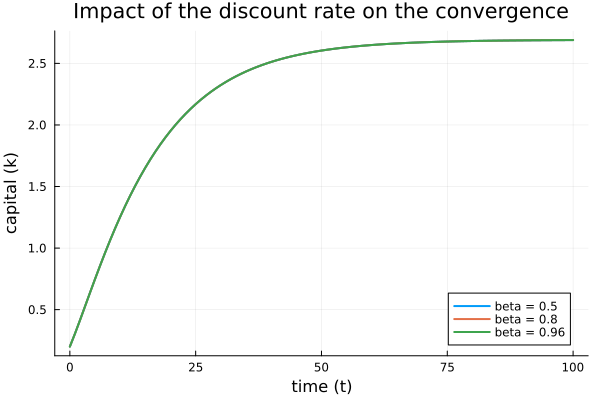

In [37]:
### Discount rate sensitivity
beta = [0.5, 0.8, 0.96]
T_sim = 100
k0_sim = 0.2
tv = 0:T_sim

p_sens = plot(title="Impact of the discount rate on the convergence", 
              xlabel="time (t)", ylabel="capital (k)", legend=:bottomright)

for beta_val in beta
    p_local = merge(model, (; β = beta_val))
    kv = simulate(k0_sim, T_sim, p_local)
    plot!(p_sens, tv, kv, label="beta = $beta_val", lw=2)
end

display(p_sens)

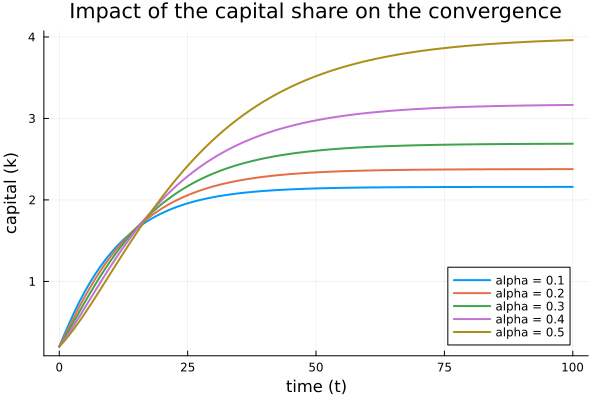

In [38]:
### Capital share sensitivity
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
T_sim = 100
k0_sim = 0.2
tv = 0:T_sim

p_sens = plot(title="Impact of the capital share on the convergence", 
              xlabel="time (t)", ylabel="capital (k)", legend=:bottomright)

for alpha_val in alpha
    p_local = merge(model, (; α = alpha_val))
    kv = simulate(k0_sim, T_sim, p_local)
    plot!(p_sens, tv, kv, label="alpha = $alpha_val", lw=2)
end

display(p_sens)

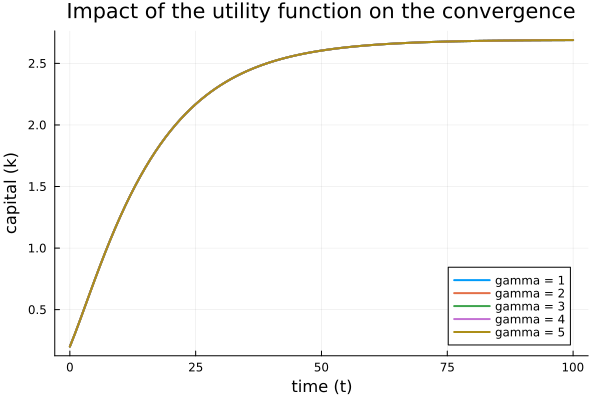

In [39]:
### Gamma sensitivity
gamma = [1, 2, 3, 4, 5]
T_sim = 100
k0_sim = 0.2
tv = 0:T_sim

p_sens = plot(title="Impact of the utility function on the convergence", 
              xlabel="time (t)", ylabel="capital (k)", legend=:bottomright)

for gamma_val in gamma
    p_local = merge(model, (; γ = gamma_val))
    kv = simulate(k0_sim, T_sim, p_local)
    plot!(p_sens, tv, kv, label="gamma = $gamma_val", lw=2)
end

display(p_sens)

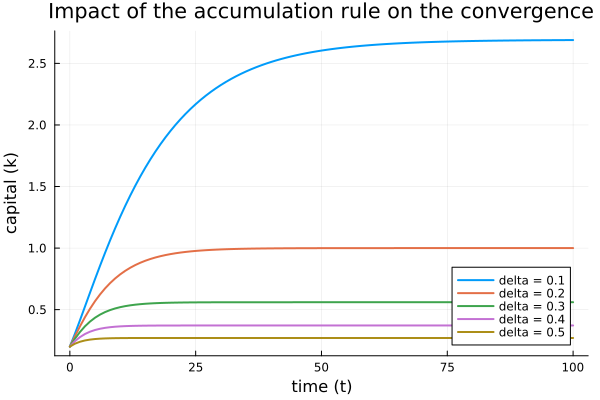

In [40]:
### Accumulation rule sensitivity
delta = [0.1, 0.2, 0.3, 0.4, 0.5]
T_sim = 100
k0_sim = 0.2
tv = 0:T_sim

p_sens = plot(title="Impact of the accumulation rule on the convergence", 
              xlabel="time (t)", ylabel="capital (k)", legend=:bottomright)

for delta_val in delta
    p_local = merge(model, (; δ = delta_val))
    kv = simulate(k0_sim, T_sim, p_local)
    plot!(p_sens, tv, kv, label="delta = $delta_val", lw=2)
end

display(p_sens)

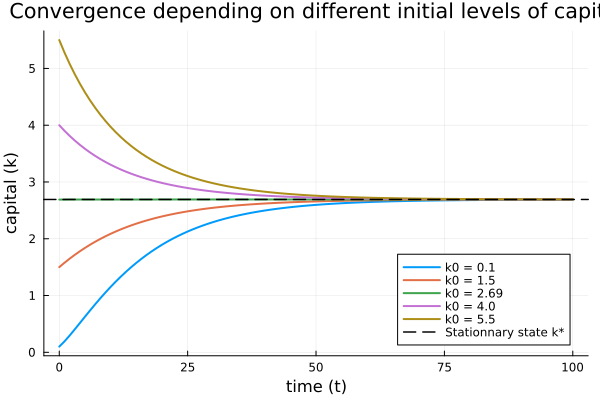

In [46]:
### Different k0
k0_values = [0.1, 1.5, 2.69, 4.0, 5.5]
T_sim = 100
tv = 0:T_sim

p_k0 = plot(title="Convergence depending on different initial levels of capital", 
            xlabel="time (t)", ylabel="capital (k)", legend=:bottomright)

for k0_val in k0_values
    kv = simulate_noalloc(k0_val, T_sim, model)
    plot!(p_k0, tv, kv, label="k0 = $k0_val", lw=2)
end

k_star = (model.s / model.δ)^(1/(1-model.α))
hline!(p_k0, [k_star], label="Stationnary state k*", linestyle=:dash, color=:black, lw=1.5)

display(p_k0)

### **Convergence speed : measure, speed-up**

In [48]:
# theoretical stationnary state (k*)
k_star = (model.s / model.δ)^(1/(1-model.α))

function measure_convergence(k0, p; tolerance=1e-6, max_iter=500)
    k = k0
    for t in 0:max_iter
        if abs(k - k_star) < tolerance
            return t # number of periods to converge
        end
        k = f(k, p)
    end
    return max_iter
end

k0_values = [0.2, 1.5, 2.69, 4.0, 5]

for k0_val in k0_values
    speed = measure_convergence(k0_val, model)  
    println("Number of periods to converge (k0=$k0_val) : ", speed)
end

Number of periods to converge (k0=0.2) : 207
Number of periods to converge (k0=1.5) : 194
Number of periods to converge (k0=2.69) : 104
Number of periods to converge (k0=4.0) : 194
Number of periods to converge (k0=5.0) : 201


In [55]:
### Speed up convergence : Newton method
function newton_solow(k0, p; tol=1e-10, max_iter=50)
    (; α, δ, s) = p
    k = k0
    trajectoire = [k]
    
    for i in 1:max_iter
        gk = s * k^α - δ * k
        g_prime = s * α * k^(α-1) - δ
        
        k_next = k - gk / g_prime
        
        # Correction : Si k_next est absurde (négatif), 
        # on fait un petit pas prudent à la place
        if k_next <= 0
            k_next = k * 1.5 
        end
        
        push!(trajectoire, k_next)
        if abs(k_next - k) < tol break end
        k = k_next
    end
    return trajectoire
end

res_newton = newton_solow(0.2, model)
println("Convergence obtained in $(length(res_newton)) iterations with Newton.")

Convergence obtained in 10 iterations with Newton.


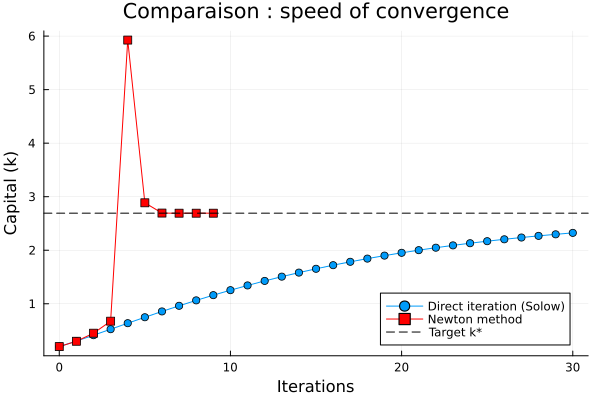

In [58]:
T_limit = 30
kv_direct = simulate_noalloc(0.2, T_limit, model)
kv_newton = newton_solow(0.2, model)

p_final = plot(title="Comparaison : speed of convergence",
               xlabel="Iterations", ylabel="Capital (k)", legend=:bottomright)

plot!(p_final, 0:T_limit, kv_direct, label="Direct iteration (Solow)", marker=:circle)
plot!(p_final, 0:length(kv_newton)-1, kv_newton, label="Newton method", marker=:square, color=:red)
hline!(p_final, [k_star], label="Target k*", linestyle=:dash, color=:black)

display(p_final)